In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("machine_sensor_data.csv")
df

,Temperature,Vibration,RPM,Pressure,Status
0,79.967142,3.750627,1463.420712,26.391312,Normal
1,73.617357,2.587164,1774.975284,30.884104,Faulty
2,81.476885,3.076897,1370.807164,27.266600,Normal
3,90.230299,2.630180,1340.161599,28.641724,Faulty
4,72.658466,2.652403,1403.451296,38.367260,Faulty
...,...,...,...,...,...
795,85.531529,2.192215,1210.070956,20.599950,Faulty
796,74.604448,3.495323,1315.628037,33.563560,Normal
797,81.815007,4.645996,1299.208526,20.584249,Faulty
798,75.283184,3.016635,1541.453466,28.138405,Normal


In [3]:
x = df.drop("Status",axis = 1)
y = df["Status"]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

In [5]:
model = GaussianNB()
model.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


In [6]:
y_pred = model.predict(x_test)
y_pred

array(['Normal', 'Normal', 'Faulty', 'Faulty', 'Faulty', 'Faulty',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Faulty', 'Normal',
       'Faulty', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Faulty', 'Normal', 'Faulty', 'Normal', 'Normal', 'Faulty',
       'Normal', 'Normal', 'Normal', 'Faulty', 'Normal', 'Faulty',
       'Normal', 'Normal', 'Faulty', 'Normal', 'Normal', 'Normal',
       'Faulty', 'Normal', 'Normal', 'Faulty', 'Normal', 'Normal',
       'Faulty', 'Normal', 'Faulty', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Faulty', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Faulty', 'Normal',
       'Faulty', 'Normal', 'Normal', 'Faulty', 'Faulty', 'Normal',
       'Faulty', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

In [7]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.86875

Predicted Performance: Faulty


c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


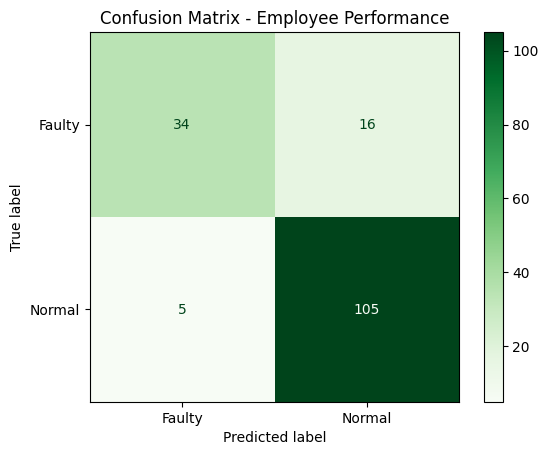

In [8]:
new_data = np.array([[68.9, 2.10, 1985.7, 36.2]])
prediction = model.predict(new_data)
if prediction[0] == "Faulty":
    print("Predicted Performance: Faulty")
else:
    print("Predicted Performance: Normal")

con_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=["Faulty", "Normal"])
display.plot(cmap='Greens')
plt.title("Confusion Matrix - Employee Performance")
plt.show()